<a href="https://colab.research.google.com/github/abhimanyu199099/ArrowDetection/blob/main/Annotations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Aug 30 05:53:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:


import os
HOME = os.getcwd()
print("HOME:", HOME)

%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!git checkout -q 57535c5a79791cb76e36fdb64975271354f10251
!pip install -q -e .



%cd {HOME}

import sys
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

!pip uninstall -y supervision
!pip install -q supervision==0.6.0

import supervision as sv
print(sv.__version__)



!pip install -q roboflow



HOME: /content
/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 401, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 401 (delta 58), reused 50 (delta 50), pack-reused 316
Receiving objects: 100% (401/401), 12.85 MiB | 9.91 MiB/s, done.
Resolving deltas: 100% (204/204), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 73.7 MB/s eta 0:00:00
/content
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-bu

In [ ]:
import os

GROUNDING_DINO_CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(GROUNDING_DINO_CONFIG_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CONFIG_PATH))

%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

GROUNDING_DINO_CHECKPOINT_PATH = os.path.join(HOME, "weights", "groundingdino_swint_ogc.pth")
print(GROUNDING_DINO_CHECKPOINT_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CHECKPOINT_PATH))


GROUNDING_DINO_CHECKPOINT_PATH = os.path.join(HOME, "weights", "groundingdino_swint_ogc.pth")
print(GROUNDING_DINO_CHECKPOINT_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CHECKPOINT_PATH))

SAM_CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(SAM_CHECKPOINT_PATH, "; exist:", os.path.isfile(SAM_CHECKPOINT_PATH))



%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights

!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth






/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True
/content
/content/weights
/content/weights/groundingdino_swint_ogc.pth ; exist: True
/content/weights/groundingdino_swint_ogc.pth ; exist: True
/content/weights/sam_vit_h_4b8939.pth ; exist: False
/content
/content/weights


In [ ]:
import torch

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

%cd {HOME}/GroundingDINO

from groundingdino.util.inference import Model

grounding_dino_model = Model(model_config_path=GROUNDING_DINO_CONFIG_PATH, model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH)

/content/GroundingDINO


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


In [ ]:

SAM_ENCODER_VERSION = "vit_h"

In [ ]:


from segment_anything import sam_model_registry, SamPredictor

sam = sam_model_registry[SAM_ENCODER_VERSION](checkpoint=SAM_CHECKPOINT_PATH).to(device=DEVICE)
sam_predictor = SamPredictor(sam)

f"{HOME}/data"

%cd {HOME}
!mkdir {HOME}/data
%cd {HOME}/data

/content
/content/data


In [ ]:
SOURCE_IMAGE_PATH = f"{HOME}/drive/MyDrive/Dataset/frames2/vid2frame0000.png"
CLASSES = ['arrow']
BOX_TRESHOLD = 0.30
TEXT_TRESHOLD = 0.25

In [ ]:
from typing import List

def enhance_class_name(class_names: List[str]) -> List[str]:
    return [
        f"all {class_name}s"
        for class_name
        in class_names
    ]

(108, 192, 3)


/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:900: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


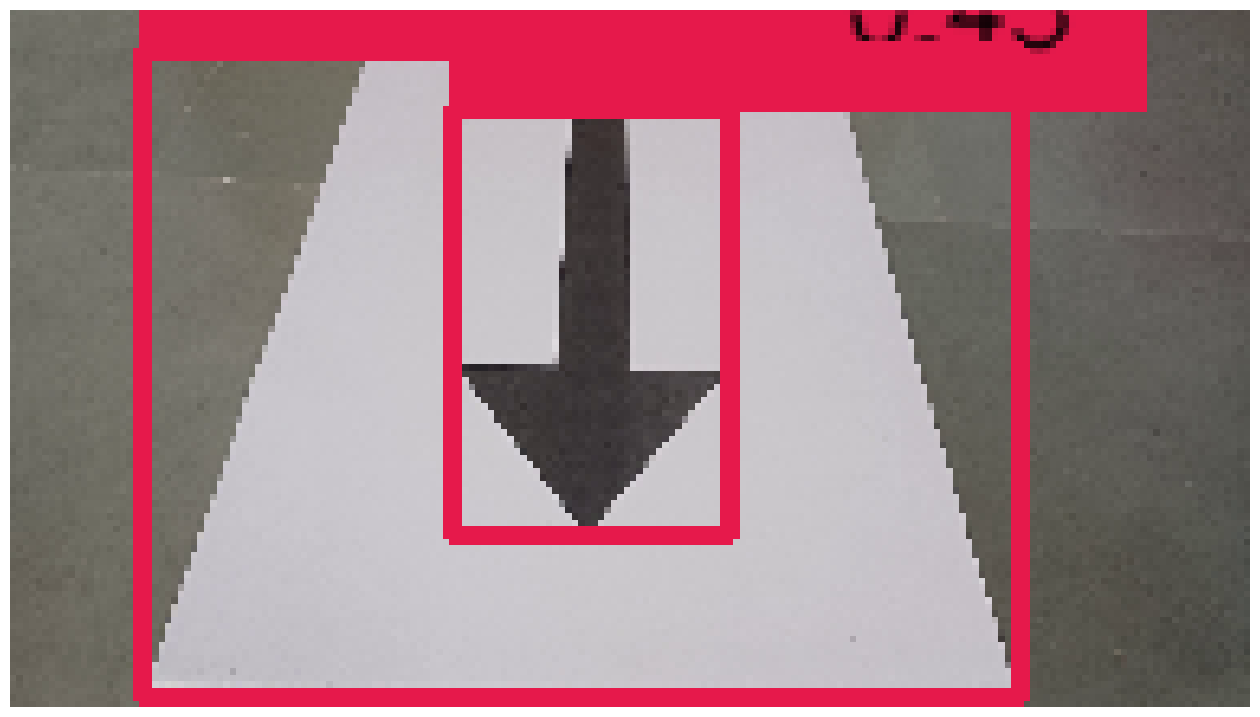

In [ ]:
import cv2
import supervision as sv

# load image
SOURCE_IMAGE_PATH = f"{HOME}/drive/MyDrive/Dataset/frames3/vid3frame0100.png"
image = cv2.imread(SOURCE_IMAGE_PATH)
print (image.shape)

# detect objects
detections = grounding_dino_model.predict_with_classes(
    image=image,
    classes=enhance_class_name(class_names=CLASSES),
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

# annotate image with detections
box_annotator = sv.BoxAnnotator()
labels = [
    f"{CLASSES[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _
    in detections]
annotated_frame = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

In [ ]:

import numpy as np
from segment_anything import SamPredictor


def segment(sam_predictor: SamPredictor, image: np.ndarray, xyxy: np.ndarray) -> np.ndarray:
    sam_predictor.set_image(image)
    result_masks = []
    for box in xyxy:
        masks, scores, logits = sam_predictor.predict(
            box=box,
            multimask_output=True
        )
        index = np.argmax(scores)
        result_masks.append(masks[index])
    return np.array(result_masks)



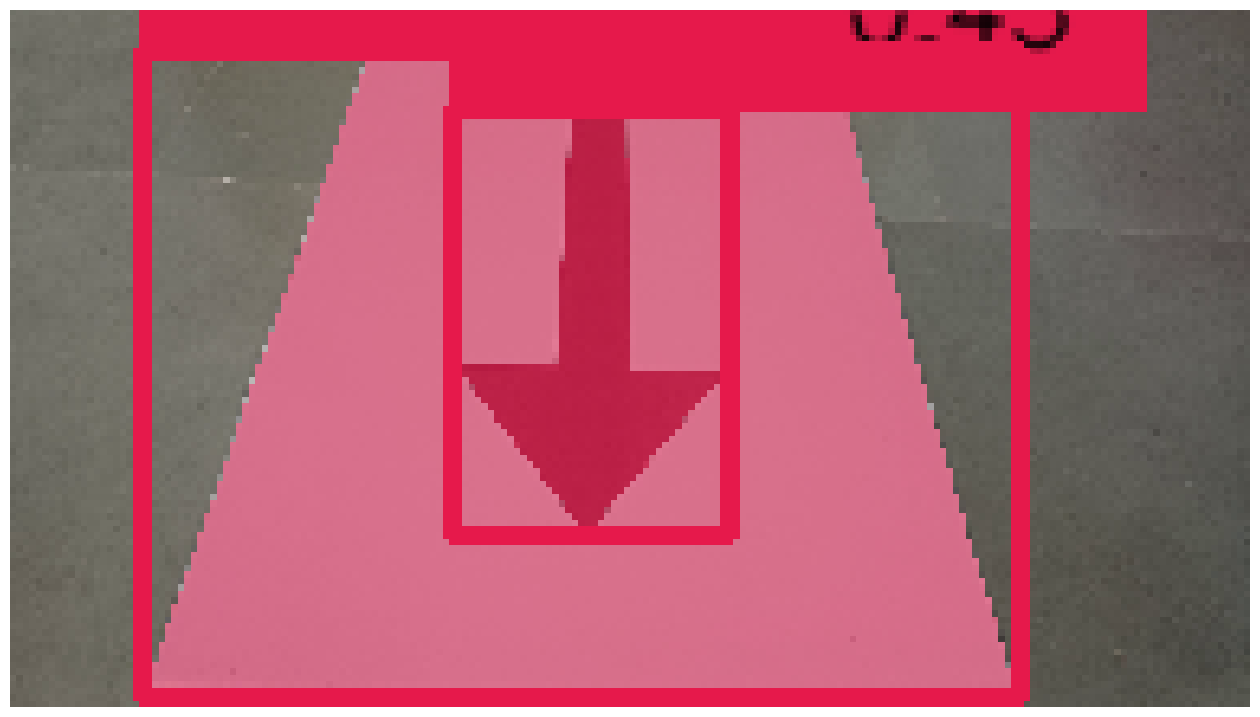

In [ ]:
import cv2

# convert detections to masks
detections.mask = segment(
    sam_predictor=sam_predictor,
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
    xyxy=detections.xyxy
)

# annotate image with detections
box_annotator = sv.BoxAnnotator()
mask_annotator = sv.MaskAnnotator()
labels = [
    f"{CLASSES[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _
    in detections]
annotated_image = mask_annotator.annotate(scene=image.copy(), detections=detections)
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)

%matplotlib inline
sv.plot_image(annotated_image, (16, 16))

In [ ]:

import os

FOLDERS = ['drive/MyDrive/Dataset/frames1','drive/MyDrive/Dataset/frames2','drive/MyDrive/Dataset/frames3',
           'drive/MyDrive/Dataset/frames4','drive/MyDrive/Dataset/frames5','drive/MyDrive/Dataset/frames6',
           'drive/MyDrive/Dataset/frames7','drive/MyDrive/Dataset/frames8','drive/MyDrive/Dataset/frames9']
IMAGES_DIRECTORY = os.path.join(HOME, 'drive/MyDrive/Dataset/frames5')
IMAGES_EXTENSIONS = ['jpg', 'jpeg', 'png']

CLASSES = ['arrow']
BOX_TRESHOLD = 0.30
TEXT_TRESHOLD = 0.25



In [ ]:
import cv2
from tqdm.notebook import tqdm

images = {}
annotations = {}


for i in range (0,len(FOLDERS)):
  FULL_IMAGES_DIRECTORY = os.path.join(HOME, FOLDERS[i])
  image_paths = sv.list_files_with_extensions(
    directory=FULL_IMAGES_DIRECTORY,
    extensions=IMAGES_EXTENSIONS)

  for image_path in tqdm(image_paths):
    image_name = image_path.name
    image_path = str(image_path)
    image = cv2.imread(image_path)

    detections = grounding_dino_model.predict_with_classes(
        image=image,
        classes=enhance_class_name(class_names=CLASSES),
        box_threshold=BOX_TRESHOLD,
        text_threshold=TEXT_TRESHOLD
    )
    detections = detections[detections.class_id != None]
    detections.mask = segment(
        sam_predictor=sam_predictor,
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
        xyxy=detections.xyxy
    )

    grouped_element = image[:]
    image = np.array (grouped_element)

    images[image_name] = image
    annotations[image_name] = detections




  0%|          | 0/208 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:900: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


  0%|          | 0/178 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/174 [00:00<?, ?it/s]

  0%|          | 0/172 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/197 [00:00<?, ?it/s]

  0%|          | 0/351 [00:00<?, ?it/s]

  0%|          | 0/187 [00:00<?, ?it/s]

In [ ]:


ANNOTATIONS_DIRECTORY = os.path.join(HOME, 'annotations')

MIN_IMAGE_AREA_PERCENTAGE = 0.002
MAX_IMAGE_AREA_PERCENTAGE = 0.80
APPROXIMATION_PERCENTAGE = 0.75



In [ ]:


sv.Dataset(
    classes=CLASSES,
    images=images,
    annotations=annotations
).as_pascal_voc(
    annotations_directory_path=ANNOTATIONS_DIRECTORY,
    min_image_area_percentage=MIN_IMAGE_AREA_PERCENTAGE,
    max_image_area_percentage=MAX_IMAGE_AREA_PERCENTAGE,
    approximation_percentage=APPROXIMATION_PERCENTAGE
)



In [ ]:


PROJECT_NAME = "Arrow-Detect"
PROJECT_DESCRIPTION = "dataset-for-IRC-arrow-detection"

import roboflow
from roboflow import Roboflow

roboflow.login(force=True)

workspace = Roboflow().workspace()
new_project = workspace.create_project(
    project_name=PROJECT_NAME,
    project_license="MIT",
    project_type="instance-segmentation",
    annotation=PROJECT_DESCRIPTION)

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...


In [ ]:


import os

for i in range (0,len(FOLDERS)):

  FULL_IMAGES_DIRECTORY = os.path.join(HOME, FOLDERS[i])
  image_paths = sv.list_files_with_extensions(
    directory=FULL_IMAGES_DIRECTORY,
    extensions=IMAGES_EXTENSIONS)

  for image_path in tqdm(image_paths):
    image_name = image_path.name
    annotation_name = f"{image_path.stem}.xml"
    image_path = str(image_path)
    annotation_path = os.path.join(ANNOTATIONS_DIRECTORY, annotation_name)
    new_project.upload(
        image_path=image_path,
        annotation_path=annotation_path,
        split="train",
        is_prediction=True,
        overwrite=True,
        tag_names=["auto-annotated-with-grounded-sam"],
        batch_name="auto-annotated-with-grounded-sam"
    )





  0%|          | 0/208 [00:00<?, ?it/s]

/content/annotations/vid1frame0000.xml ERROR saving annotation: save annotation for JRi7pJOmudBp72CvdyC6 / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnnotations': [{'type': 'warning', 'code': 'annotation:trimmed', 'key': 'vid1frame0000.png', 'label': 'arrow'}]}
/content/annotations/vid1frame0001.xml ERROR saving annotation: save annotation for VdFc0tWmxvBvrNbtk8Xc / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnnotations': [{'type': 'warning', 'code': 'annotation:trimmed', 'key': 'vid1frame0001.png', 'label': 'arrow'}]}
/content/annotations/vid1frame0003.xml ERROR saving annotation: save annotation for 69gHCBIi0y9AQzNHTrzi / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnn

  0%|          | 0/178 [00:00<?, ?it/s]

/content/annotations/vid2frame0033.xml ERROR saving annotation: save annotation for QixvnRGzoR3NiCSiFzvE bad response: <Response [502]>
/content/drive/MyDrive/Dataset/frames2/vid2frame0039.png ERROR uploading image after 0 retries: Bad response: <Response [502]>


  0%|          | 0/186 [00:00<?, ?it/s]

/content/annotations/vid3frame0000.xml ERROR saving annotation: save annotation for nGRoScM1rmfu9p2UobLX / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnnotations': [{'type': 'warning', 'code': 'annotation:trimmed', 'key': 'vid3frame0000.png', 'label': 'arrow'}]}
/content/annotations/vid3frame0014.xml ERROR saving annotation: save annotation for BTzcT7zl39xx0kK0BpWy / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnnotations': [{'type': 'warning', 'code': 'annotation:trimmed', 'key': 'vid3frame0014.png', 'label': 'arrow'}]}
/content/annotations/vid3frame0008.xml ERROR saving annotation: save annotation for LKSUVZxKAdqgBQgqYV23 / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnn

  0%|          | 0/174 [00:00<?, ?it/s]

/content/annotations/vid4frame0000.xml ERROR saving annotation: save annotation for Yc2WB1IaFHjPPtQGoDUS / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnnotations': [{'type': 'warning', 'code': 'annotation:trimmed', 'key': 'vid4frame0000.png', 'label': 'arrow'}]}
/content/annotations/vid4frame0014.xml ERROR saving annotation: save annotation for FLrd5B4HXanSLmxL53YJ / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnnotations': [{'type': 'warning', 'code': 'annotation:trimmed', 'key': 'vid4frame0014.png', 'label': 'arrow'}]}
/content/annotations/vid4frame0005.xml ERROR saving annotation: save annotation for SUhmCDlnMcPAWmouWdL3 / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnn

  0%|          | 0/172 [00:00<?, ?it/s]

/content/annotations/vid5frame0000.xml ERROR saving annotation: save annotation for 7tu8uJPGDPQ3FPK8N2kN / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnnotations': [{'type': 'warning', 'code': 'annotation:trimmed', 'key': 'vid5frame0000.png', 'label': 'arrow'}]}
/content/annotations/vid5frame0006.xml ERROR saving annotation: save annotation for DA57gKMXiyG3UYZJZmPI / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnnotations': [{'type': 'warning', 'code': 'annotation:trimmed', 'key': 'vid5frame0006.png', 'label': 'arrow'}]}
/content/annotations/vid5frame0017.xml ERROR saving annotation: save annotation for IRG9FMNlSXtXaFGMWRGk / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnn

image already annotated: /content/annotations/vid5frame0074.xml
image already annotated: /content/annotations/vid5frame0066.xml
image already annotated: /content/annotations/vid5frame0057.xml
image already annotated: /content/annotations/vid5frame0065.xml
image already annotated: /content/annotations/vid5frame0072.xml
image already annotated: /content/annotations/vid5frame0068.xml
image already annotated: /content/annotations/vid5frame0064.xml
image already annotated: /content/annotations/vid5frame0070.xml
image already annotated: /content/annotations/vid5frame0067.xml
image already annotated: /content/annotations/vid5frame0071.xml
image already annotated: /content/annotations/vid5frame0056.xml


/content/annotations/vid5frame0060.xml ERROR saving annotation: save annotation for 9Gr9qL7OYDg3QhHNGpc9 / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnnotations': [{'type': 'warning', 'code': 'annotation:trimmed', 'key': 'vid5frame0060.png', 'label': 'arrow'}]}


image already annotated: /content/annotations/vid5frame0073.xml
image already annotated: /content/annotations/vid5frame0058.xml


/content/annotations/vid5frame0061.xml ERROR saving annotation: save annotation for mGHDkh3yL0geHbI1K86g / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnnotations': [{'type': 'warning', 'code': 'annotation:trimmed', 'key': 'vid5frame0061.png', 'label': 'arrow'}]}
/content/annotations/vid5frame0059.xml ERROR saving annotation: save annotation for 2DNeqZOwx3VWXHnm9iKR / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnnotations': [{'type': 'warning', 'code': 'annotation:trimmed', 'key': 'vid5frame0059.png', 'label': 'arrow'}]}


image already annotated: /content/annotations/vid5frame0069.xml


/content/annotations/vid5frame0062.xml ERROR saving annotation: save annotation for 1U11bYKkM6QfFR8hxihH / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnnotations': [{'type': 'warning', 'code': 'annotation:trimmed', 'key': 'vid5frame0062.png', 'label': 'arrow'}]}


image already annotated: /content/annotations/vid5frame0063.xml
image already annotated: /content/annotations/vid5frame0075.xml


/content/annotations/vid5frame0087.xml ERROR saving annotation: save annotation for T1SrScaQpMOnA6XrMVI6 / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnnotations': [{'type': 'warning', 'code': 'annotation:trimmed', 'key': 'vid5frame0087.png', 'label': 'arrow'}]}


image already annotated: /content/annotations/vid5frame0085.xml
image already annotated: /content/annotations/vid5frame0090.xml


/content/annotations/vid5frame0088.xml ERROR saving annotation: save annotation for geZjOm28Tsp9w2q0iXRy / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnnotations': [{'type': 'warning', 'code': 'annotation:trimmed', 'key': 'vid5frame0088.png', 'label': 'arrow'}]}


image already annotated: /content/annotations/vid5frame0084.xml
image already annotated: /content/annotations/vid5frame0076.xml
image already annotated: /content/annotations/vid5frame0078.xml


/content/annotations/vid5frame0086.xml ERROR saving annotation: save annotation for bj4lGyYGjFZQ1AeuBbhp / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnnotations': [{'type': 'warning', 'code': 'annotation:trimmed', 'key': 'vid5frame0086.png', 'label': 'arrow'}]}


image already annotated: /content/annotations/vid5frame0082.xml
image already annotated: /content/annotations/vid5frame0081.xml


/content/annotations/vid5frame0089.xml ERROR saving annotation: save annotation for 3qRv668CdFAU9v9YOrjP / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnnotations': [{'type': 'warning', 'code': 'annotation:trimmed', 'key': 'vid5frame0089.png', 'label': 'arrow'}]}


image already annotated: /content/annotations/vid5frame0083.xml
image already annotated: /content/annotations/vid5frame0092.xml
image already annotated: /content/annotations/vid5frame0080.xml
image already annotated: /content/annotations/vid5frame0077.xml
image already annotated: /content/annotations/vid5frame0094.xml
image already annotated: /content/annotations/vid5frame0091.xml
image already annotated: /content/annotations/vid5frame0093.xml
image already annotated: /content/annotations/vid5frame0079.xml
image already annotated: /content/annotations/vid5frame0107.xml
image already annotated: /content/annotations/vid5frame0098.xml
image already annotated: /content/annotations/vid5frame0103.xml
image already annotated: /content/annotations/vid5frame0102.xml
image already annotated: /content/annotations/vid5frame0101.xml
image already annotated: /content/annotations/vid5frame0113.xml
image already annotated: /content/annotations/vid5frame0099.xml
image already annotated: /content/annota

/content/annotations/vid5frame0131.xml ERROR saving annotation: save annotation for 0OEchAKEgmwOlFIUJGd1 / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnnotations': [{'type': 'warning', 'code': 'annotation:trimmed', 'key': 'vid5frame0131.png', 'label': 'arrow'}]}


image already annotated: /content/annotations/vid5frame0132.xml
image already annotated: /content/annotations/vid5frame0127.xml
image already annotated: /content/annotations/vid5frame0116.xml
image already annotated: /content/annotations/vid5frame0114.xml
image already annotated: /content/annotations/vid5frame0122.xml
image already annotated: /content/annotations/vid5frame0117.xml
image already annotated: /content/annotations/vid5frame0123.xml
image already annotated: /content/annotations/vid5frame0135.xml
image already annotated: /content/annotations/vid5frame0142.xml
image already annotated: /content/annotations/vid5frame0141.xml
image already annotated: /content/annotations/vid5frame0149.xml
image already annotated: /content/annotations/vid5frame0138.xml
image already annotated: /content/annotations/vid5frame0140.xml
image already annotated: /content/annotations/vid5frame0137.xml
image already annotated: /content/annotations/vid5frame0136.xml
image already annotated: /content/annota

/content/drive/MyDrive/Dataset/frames5/vid5frame0157.png ERROR uploading image after 0 retries: Bad response: <Response [502]>


image already annotated: /content/annotations/vid5frame0159.xml
image already annotated: /content/annotations/vid5frame0152.xml
image already annotated: /content/annotations/vid5frame0171.xml


  0%|          | 0/186 [00:00<?, ?it/s]

/content/annotations/vid6frame0008.xml ERROR saving annotation: save annotation for AhtviwfyvqhaLzZPnGLC / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnnotations': [{'type': 'warning', 'code': 'annotation:trimmed', 'key': 'vid6frame0008.png', 'label': 'arrow'}]}
/content/annotations/vid6frame0012.xml ERROR saving annotation: save annotation for TIynemZUipiAqAMivyt2 / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnnotations': [{'type': 'warning', 'code': 'annotation:trimmed', 'key': 'vid6frame0012.png', 'label': 'arrow'}]}
/content/annotations/vid6frame0013.xml ERROR saving annotation: save annotation for CsZ27wVHrHnClGVzwGsQ / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnn

  0%|          | 0/197 [00:00<?, ?it/s]

/content/annotations/vid7frame0039.xml ERROR saving annotation: save annotation for C7wsVPb7ZCxWaiNK4Bot / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnnotations': [{'type': 'warning', 'code': 'annotation:trimmed', 'key': 'vid7frame0039.png', 'label': 'arrow'}]}
/content/annotations/vid7frame0038.xml ERROR saving annotation: save annotation for xTyxNzrzxhTs8UI3XzBL / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnnotations': [{'type': 'warning', 'code': 'annotation:trimmed', 'key': 'vid7frame0038.png', 'label': 'arrow'}]}
/content/annotations/vid7frame0033.xml ERROR saving annotation: save annotation for 5ngdPvlfHHW81tvrVXGH / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnn

  0%|          | 0/351 [00:00<?, ?it/s]

/content/annotations/vid8frame0069.xml ERROR saving annotation: save annotation for xig2fkpCZyCa3aw3FRjz bad response: <Response [502]>
/content/annotations/vid8frame0165.xml ERROR saving annotation: save annotation for lM0xM36vWQ8BzdtxIAFh / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnnotations': [{'type': 'warning', 'code': 'annotation:trimmed', 'key': 'vid8frame0165.png', 'label': 'arrow'}]}
/content/annotations/vid8frame0164.xml ERROR saving annotation: save annotation for m4EPVbx78dTWtKlZX6XH / bad response: 400 - {'message': 'Invalid annotations.', 'type': 'InvalidAnnotationException', 'hint': 'All the annotations provided are invalid', 'badAnnotations': [{'type': 'warning', 'code': 'annotation:trimmed', 'key': 'vid8frame0164.png', 'label': 'arrow'}]}
/content/annotations/vid8frame0186.xml ERROR saving annotation: save annotation for yhUj9r5AOKTntjTHGeb9 bad response: <Resp

  0%|          | 0/187 [00:00<?, ?it/s]